<a href="https://colab.research.google.com/github/kasa10/Digital_Team_Gazpromneft_MIPT/blob/main/pad_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explore**

В этой части мы выводим таблицу и информацию о структуре данных

In [ ]:
import pandas as pd
pd.set_option('max_rows', 10) #Здесь можно настроить максимально возможную длинну столбца 


def explore_data():
    """ Make some visualizations and collect statistics about data in files """
    train = pd.read_csv('train.csv')
    #test = pd.read_csv('../data/test.csv')

    print(f'Размер train таблицы {train.shape}')
    #print(f'Размер test таблицы {test.shape}')

    print(f'Количество уникальных скважин в train таблице: {len(train["Номер скважины"].unique())}')
    #print(f'Количество уникальных скважин в test таблице: {len(test["Номер скважины"].unique())}')

    wells = list(train["Номер скважины"].unique())
    #print(wells) список
    well_df = train[train["Номер скважины"] == wells[0]]
    print(well_df)
    print(f'Размер таблицы с данными для одной скважины {well_df.shape}')


if __name__ == '__main__':
    explore_data()


Размер train таблицы (67136, 20)
Количество уникальных скважин в train таблице: 106
       datetime  Номер скважины  Дебит нефти  Давление забойное         x  \
0    1990-08-01               0    19.939000                NaN  18670.86   
1    1990-08-02               0    19.939000          39.064454  18670.86   
2    1990-08-03               0    21.172000          39.064487  18670.86   
3    1990-08-04               0    22.529000          38.965297  18670.86   
4    1990-08-05               0    22.529000          38.766822  18670.86   
..          ...             ...          ...                ...       ...   
615  1992-04-07               0     4.534759                NaN  18670.86   
616  1992-04-08               0     4.535000          51.641410  18670.86   
617  1992-04-09               0    14.877000          51.641410  18670.86   
618  1992-04-10               0    14.459000          51.641410  18670.86   
619  1992-04-11               0    15.434333          51.641413  1867

Здесь смотрим пропуски в данных

In [ ]:
train = pd.read_csv('train.csv')
wells = list(train["Номер скважины"].unique())
well_df = train[train["Номер скважины"] == wells[0]]
print("Количество пропусков в данных (из 620): ")

for i in range(3, 20):
  print(f'{well_df.keys()[i]} {well_df[well_df.keys()[i]][0:-1].isnull().sum()}')

  

Количество пропусков в данных (из 620): 
Давление забойное 70
x 0
y 0
Объем жидкости 598
Объем нефти 598
Активная мощность (ТМ) 75
Время работы (ТМ) 75
Газовый фактор рабочий (ТМ) 330
Давление буферное 528
Давление забойное от Hд 3
Давление забойное от Pпр 166
Давление линейное (ТМ) 2
Давление на входе ЭЦН (ТМ) 47
Дебит газа (ТМ) 127
Дебит газа попутного 239
Дебит жидкости (ТМ) 132
Коэффициент мощности (ТМ) 69


Смотрим таблички

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23        239.555
24        242.392
25            NaN
26        253.978
27        254.000
28            NaN
29        254.000
30        253.993
31        254.044
32        253.993
33        246.310
34        253.985
35        254.029
36        256.226
37        256.666
38        280.560
39        281.516
40         10.264
41          9.994
42         10.071
43          9.864
44          9.862
45         10.049
46          9.655
47          9.546
48          9.547
49          9.594
50          9.592
51          9.672
52          9.564
53          9.665
54          9.864
55        

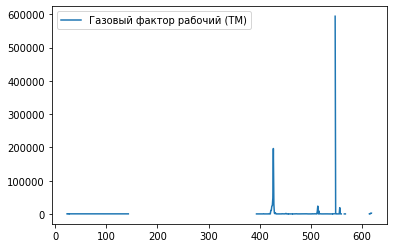

In [ ]:
pd.set_option('max_rows', 1000)
%matplotlib inline

well_df = train[train["Номер скважины"] == wells[0]]
print(well_df['Газовый фактор рабочий (ТМ)'])

#  well_df.plot(y=['Газовый фактор рабочий (ТМ)'])

**Интерполяция данных и создание файла .csv**

In [ ]:
pd.set_option('max_rows', 1000)
from google.colab import files
%matplotlib inline

wells = list(train["Номер скважины"].unique())
well_df = train

In [ ]:
well_df_int = well_df.fillna(method='pad')

In [ ]:
well_df_int_int = well_df_int.interpolate(limit_direction ='backward')

print(well_df_int_int.isnull().sum())
#print(well_df_int_int['Давление буферное'])

datetime                       0
Номер скважины                 0
Дебит нефти                    0
Давление забойное              0
x                              0
y                              0
Объем жидкости                 0
Объем нефти                    0
Активная мощность (ТМ)         0
Время работы (ТМ)              0
Газовый фактор рабочий (ТМ)    0
Давление буферное              0
Давление забойное от Hд        0
Давление забойное от Pпр       0
Давление линейное (ТМ)         0
Давление на входе ЭЦН (ТМ)     0
Дебит газа (ТМ)                0
Дебит газа попутного           0
Дебит жидкости (ТМ)            0
Коэффициент мощности (ТМ)      0
dtype: int64


In [ ]:
well_df_int_int.to_csv('linear_interpolate_data.csv', index=False) 
files.download('linear_interpolate_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

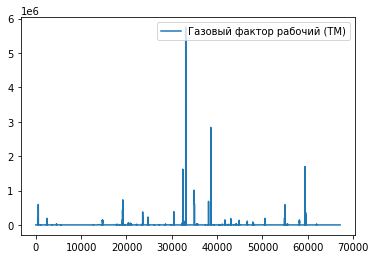

In [ ]:
well_df_int_int.plot(y=['Газовый фактор рабочий (ТМ)'])